In [1]:
import math

import itertools
import numpy as np
import pandas as pd
import plotnine as plt9
import scipy.stats

## Probability Mass Function (mean)

In [2]:
def n_choose_k(n: int, k: int) -> float:
    assert k <= n
    
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

def probability_mass_function(k: int, n: int, p: float) -> float:
    """
    Probability that an event occurs exactly k times given that it has n opportunities to occur
    and each opportunioty has a p chance of the event occurring.
    
    k = number of times we want the event to occur (exactly)
    n = number of opportunities for the event to occur
    p = probability of event occuring when given one opportunbity to occur
    
    For example, to model a fair coin being flipped 10 times and having exactly 6 heads occur,
    k = 6, n = 10, p = 0.5.
    
    https://en.wikipedia.org/wiki/Binomial_distribution#Probability_mass_function
    """
    assert k <= n
    
    return n_choose_k(n, k) * (p ** k) * ((1 - p) ** (n - k))

In [3]:
print(n_choose_k(4, 2))
print(probability_mass_function(10, 10, 0.5))   # Chance of 10 out of 10 coins being all heads
print(probability_mass_function(0, 10, 0.5))    # ... all tails
print(probability_mass_function(5, 10, 0.5))    # ... half heads, half tails

6.0
0.0009765625
0.0009765625
0.24609375


In [4]:
ks = np.arange(0, 11)
ns = np.arange(1, 11)
ps = np.array([0.5])

output = []

combinations = [
    (k, n, p)
    for k, n, p in itertools.product(ks, ns, ps)
    if k <= n
]
for k, n, p in combinations:
    o = probability_mass_function(k, n, p)
    output.append((k, n, p, o))
    
data = pd.DataFrame(output, columns=["k", "n", "p", "o"])
data

,k,n,p,o
0,0,1,0.5,0.500000
1,0,2,0.5,0.250000
2,0,3,0.5,0.125000
3,0,4,0.5,0.062500
4,0,5,0.5,0.031250
...,...,...,...,...
60,8,9,0.5,0.017578
61,8,10,0.5,0.043945
62,9,9,0.5,0.001953
63,9,10,0.5,0.009766


/home/chris/anaconda3/envs/pokeslots-stats/lib/python3.8/site-packages/plotnine/facets/facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


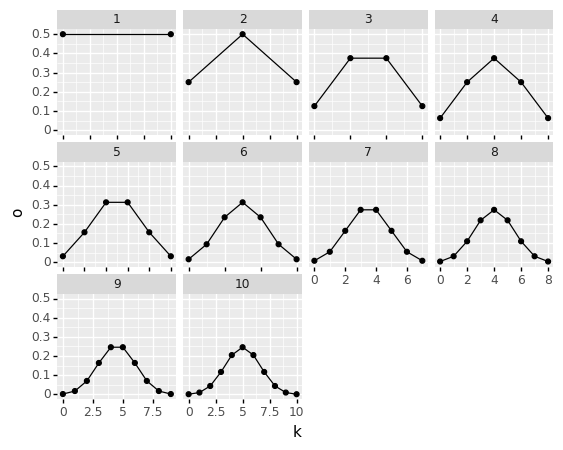

<ggplot: (8735663943650)>

In [5]:
plt9.ggplot(data, plt9.aes("k", "o")) +\
    plt9.facet_wrap("n", scales="free_x") +\
    plt9.geom_point() +\
    plt9.geom_line()

## Cumulative distribution (chance of occuring <= k times)

In [6]:
def cumulative_distribution(k: int, n: int, p: float) -> float:
    """
    Chance of getting <= k occurances.
    
    For example, the chance of getting less than 6 heads with a fair coin given 10 flips couild be
    calculated with:
    
    k = (6 - 1) = 5
    n = 10
    p = 0.5
    """
    total = 0
    for i in range(0, k + 1):
        total += probability_mass_function(i, n, p)
        
    return total

In [7]:
print(cumulative_distribution(0, 10, 0.5))    # Chance of 0 out of 10 flips being heads
print(cumulative_distribution(1, 10, 0.5))    # ... (0 or 1) out of 10
print(cumulative_distribution(5, 10, 0.5))    # ... <= 5 out of 10
print(cumulative_distribution(10, 10, 0.5))   # ... <= 10 out of 10

0.0009765625
0.0107421875
0.623046875
1.0


In [8]:
ks = np.arange(0, 11)
ns = np.arange(1, 11)
ps = np.array([0.5])

output = []

combinations = [
    (k, n, p)
    for k, n, p in itertools.product(ks, ns, ps)
    if k <= n
]
for k, n, p in combinations:
    o = cumulative_distribution(k, n, p)
    output.append((k, n, p, o))
    
data2 = pd.DataFrame(output, columns=["k", "n", "p", "o"])
data2

,k,n,p,o
0,0,1,0.5,0.500000
1,0,2,0.5,0.250000
2,0,3,0.5,0.125000
3,0,4,0.5,0.062500
4,0,5,0.5,0.031250
...,...,...,...,...
60,8,9,0.5,0.998047
61,8,10,0.5,0.989258
62,9,9,0.5,1.000000
63,9,10,0.5,0.999023


/home/chris/anaconda3/envs/pokeslots-stats/lib/python3.8/site-packages/plotnine/facets/facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


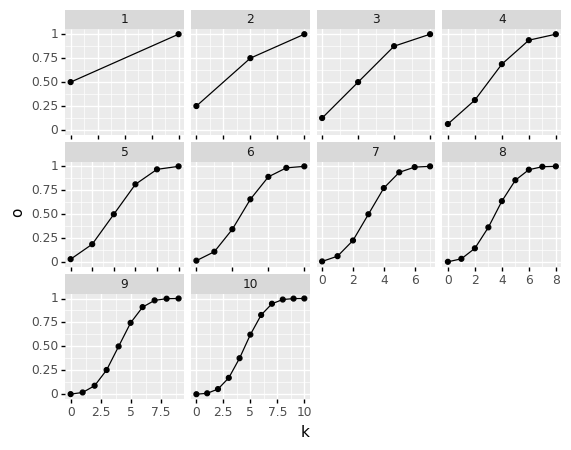

<ggplot: (8735661534495)>

In [9]:
plt9.ggplot(data2, plt9.aes("k", "o")) +\
    plt9.facet_wrap("n", scales="free_x") +\
    plt9.geom_point() +\
    plt9.geom_line()

## Expected value (most likely num times to occur)

In [10]:
def expected_value(n: int, p: float) -> float:
    return n * p

In [11]:
ks = np.arange(0, 11)
ns = np.arange(1, 11)
ps = np.array([0.5])

output = []

combinations = [
    (k, n, p)
    for k, n, p in itertools.product(ks, ns, ps)
    if k <= n
]
for k, n, p in combinations:
    o = probability_mass_function(k, n, p)
    e = expected_value(n, p)
    output.append((k, n, p, o, e))
    
data3 = pd.DataFrame(output, columns=["k", "n", "p", "o", "e"])
data3

,k,n,p,o,e
0,0,1,0.5,0.500000,0.5
1,0,2,0.5,0.250000,1.0
2,0,3,0.5,0.125000,1.5
3,0,4,0.5,0.062500,2.0
4,0,5,0.5,0.031250,2.5
...,...,...,...,...,...
60,8,9,0.5,0.017578,4.5
61,8,10,0.5,0.043945,5.0
62,9,9,0.5,0.001953,4.5
63,9,10,0.5,0.009766,5.0


/home/chris/anaconda3/envs/pokeslots-stats/lib/python3.8/site-packages/plotnine/facets/facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


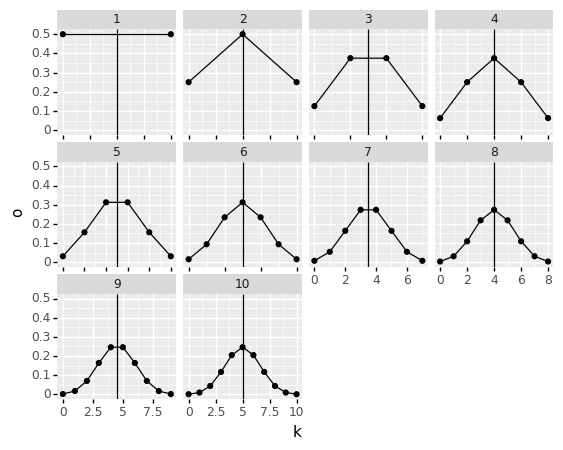

<ggplot: (8735661722643)>

In [12]:
plt9.ggplot(data3, plt9.aes("k", "o")) +\
    plt9.facet_wrap("n", scales="free_x") +\
    plt9.geom_point() +\
    plt9.geom_line() +\
    plt9.geom_vline(plt9.aes(xintercept="e"))

## Variance & Standard deviation

In [13]:
def variance(n: int, p: float) -> float:
    return expected_value(n, p) * (1.0 - p)

def standard_deviation(n: int, p: float) -> float:
    return math.sqrt(variance(n, p))

In [14]:
ks = np.arange(0, 11)
ns = np.arange(1, 11)
ps = np.array([0.5])

output = []

combinations = [
    (k, n, p)
    for k, n, p in itertools.product(ks, ns, ps)
    if k <= n
]
for k, n, p in combinations:
    o = probability_mass_function(k, n, p)
    e = expected_value(n, p)
    v = variance(n, p)
    vp = e + v
    vn = e - v
    stdev = standard_deviation(n, p)
    stdevp = e + stdev
    stdevn = e - stdev
    output.append((k, n, p, o, e, v, vp, vn, stdev, stdevp, stdevn))
    
data4 = pd.DataFrame(output, columns=["k", "n", "p", "o", "e", "v", "vp", "vn", "stdev", "stdevp", "stdevn"])
data4

,k,n,p,o,e,v,vp,vn,stdev,stdevp,stdevn
0,0,1,0.5,0.500000,0.5,0.25,0.75,0.25,0.500000,1.000000,0.000000
1,0,2,0.5,0.250000,1.0,0.50,1.50,0.50,0.707107,1.707107,0.292893
2,0,3,0.5,0.125000,1.5,0.75,2.25,0.75,0.866025,2.366025,0.633975
3,0,4,0.5,0.062500,2.0,1.00,3.00,1.00,1.000000,3.000000,1.000000
4,0,5,0.5,0.031250,2.5,1.25,3.75,1.25,1.118034,3.618034,1.381966
...,...,...,...,...,...,...,...,...,...,...,...
60,8,9,0.5,0.017578,4.5,2.25,6.75,2.25,1.500000,6.000000,3.000000
61,8,10,0.5,0.043945,5.0,2.50,7.50,2.50,1.581139,6.581139,3.418861
62,9,9,0.5,0.001953,4.5,2.25,6.75,2.25,1.500000,6.000000,3.000000
63,9,10,0.5,0.009766,5.0,2.50,7.50,2.50,1.581139,6.581139,3.418861


/home/chris/anaconda3/envs/pokeslots-stats/lib/python3.8/site-packages/plotnine/facets/facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


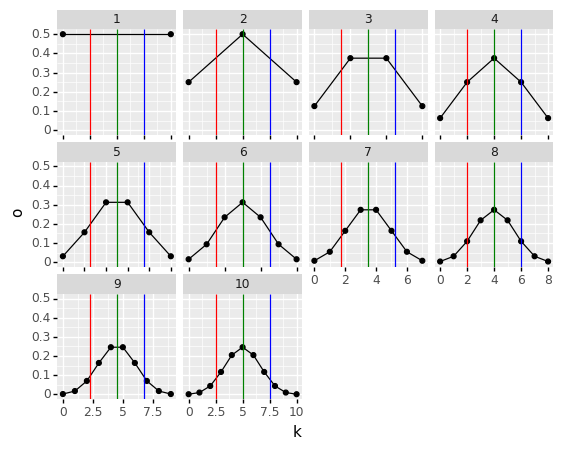

<ggplot: (8735661762449)>

In [15]:
plt9.ggplot(data4, plt9.aes("k", "o")) +\
    plt9.facet_wrap("n", scales="free_x") +\
    plt9.geom_point() +\
    plt9.geom_line() +\
    plt9.geom_vline(plt9.aes(xintercept="vn"), color="red") +\
    plt9.geom_vline(plt9.aes(xintercept="e"), color="green") +\
    plt9.geom_vline(plt9.aes(xintercept="vp"), color="blue")

/home/chris/anaconda3/envs/pokeslots-stats/lib/python3.8/site-packages/plotnine/facets/facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


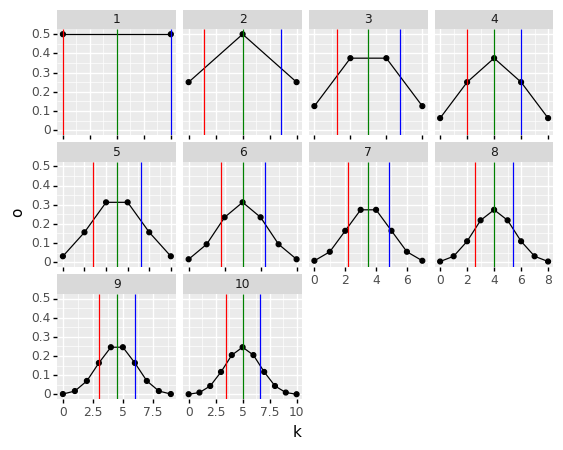

<ggplot: (8735661167779)>

In [16]:
plt9.ggplot(data4, plt9.aes("k", "o")) +\
    plt9.facet_wrap("n", scales="free_x") +\
    plt9.geom_point() +\
    plt9.geom_line() +\
    plt9.geom_vline(plt9.aes(xintercept="stdevn"), color="red") +\
    plt9.geom_vline(plt9.aes(xintercept="e"), color="green") +\
    plt9.geom_vline(plt9.aes(xintercept="stdevp"), color="blue")

## Estimation of parameters

In [17]:
rng = np.random.default_rng(42)

p_unknown = 0.751234
n = 10000
#x = int(expected_value(n, p_unknown))

sample = [s <= p_unknown for s in rng.random(n)]
x = len([s for s in sample if s == True])

x

7565

In [18]:
def estimate_p(n: int, x: int) -> float:
    return x / n

In [19]:
p_estimated = estimate_p(n, x)

p_estimated

0.7565

## Confidence intervals

In [20]:
def calc_z(alpha: float) -> float:
    return scipy.stats.norm.ppf(1 - 0.5 * alpha)

def wald_method(n: int, x: int, alpha: float) -> float:
    z = calc_z(alpha)
    p_hat = x / n
    
    return z * math.sqrt((p_hat * (1 - p_hat)) / n)

def agresti_coull_method(n: int, x: int, alpha: float) -> float:
    z = calc_z(alpha)
    p_tilde = (x + 0.5 * z ** 2) / (n + z ** 2)
    
    return z * math.sqrt((p_tilde * (1 - p_tilde)) / (n + z ** 2))

In [21]:
print(calc_z(0.05))
print(wald_method(n, x, 0.05))
print(agresti_coull_method(n, x, 0.05))

1.959963984540054
0.008412053768716166
0.008411591698368725


In [22]:
output = []
for sub_n in range(1, n + 1, 100):
    sub_sample = sample[0:sub_n]
    x_sample = len([s for s in sub_sample if s == True])
    
    p_estimated = estimate_p(sub_n, x_sample)
    confidence_interval = wald_method(sub_n, x_sample, 0.05)
                           
    output.append((sub_n, x_sample, p_estimated, confidence_interval))
    
data5 = pd.DataFrame(output, columns=["n", "x", "p_estimated", "confidence_interval"])
data5

,n,x,p_estimated,confidence_interval
0,1,0,0.000000,0.000000
1,101,77,0.762376,0.083007
2,201,151,0.751244,0.059762
3,301,225,0.747508,0.049079
4,401,300,0.748130,0.042487
...,...,...,...,...
95,9501,7177,0.755394,0.008643
96,9601,7260,0.756171,0.008589
97,9701,7333,0.755901,0.008548
98,9801,7411,0.756147,0.008501


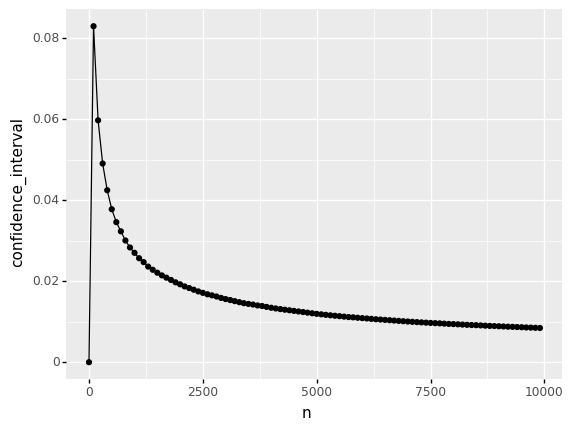

<ggplot: (8735661427821)>

In [23]:
plt9.ggplot(data5, plt9.aes("n", "confidence_interval")) +\
    plt9.geom_point() +\
    plt9.geom_line()